# Transfer Learning

In [19]:
import matplotlib.pyplot as plt
import numpy as np

#file = './backup_results_final/results.accuracy.results_tfv1.1.1_C_2.0.csv'
#file = './backup_results_final/results.accuracy.results_tfv1.1.2_C_2.0.csv'
#file = './backup_results_final/results.accuracy.results_tfv1.2.1_C_2.0.csv'
#file = './backup_results_final/results.accuracy.results_tfv1.2.2_C_2.0.csv'
#file = './backup_results_final/results.accuracy.results_tfv2.1.1_C_2.0.csv'
#file = './backup_results_final/results.accuracy.results_tfv2.1.2_C_2.0.csv'
#file = './backup_results_final/results.accuracy.results_tfv2.2.1_C_1.0.csv'
#file = './backup_results_final/results.accuracy.results_tfv2.2.1_C_2.0.csv'
#file = './backup_results_final/results.accuracy.results_tfv2.2.1_C_3.0.csv'
file = './backup_results_final/results.accuracy.results_tfv2.2.1_C_3.5.csv'
#file = './backup_results_final/results.accuracy.results_tfv2.2.2_C_3.0.csv'
#file = './backup_results_final/results.accuracy.results_tfv3.1.1_C_2.0.csv'
#file = './backup_results_final/results.accuracy.results_tfv3.1.2_C_2.0.csv'
#file = './backup_results_final/results.accuracy.results_tfv3.2.1_C_2.0.csv'
#file = './backup_results_final/results.accuracy.results_tfv3.2.2_C_2.0.csv'

model_names = list()
model_accuracys = list()
with open(file) as f:
    for line in f:
        tokens = line.split(',')
        #results.append((tokens[0],tokens[1],tokens[2]))
        model_names.append(tokens[0])
        model_accuracys.append(float(tokens[1].rstrip()))

model_vocabulary_len = list()
for model in model_names:
    with open('./llda_train_input/'+model+'_features.dat') as f:
        line = f.readline()
        model_vocabulary_len.append(len(line.split()))
        
model_topics_len = list()
for model in model_names:
    topics_count = 0
    
    if 'expanded' in model:
        tokens = model.split('_expanded')
        labelmap_path = './llda_train_input/'+tokens[0]+'_labelmap.sub'
    else:
        labelmap_path = './llda_train_input/'+model+'_labelmap.sub'
        
    with open(labelmap_path) as f:
        for line in f:
            topics_count += 1
    model_topics_len.append(topics_count)

results = zip(model_names, model_accuracys, model_vocabulary_len, model_topics_len)
results_tr = list()
results_2 = list()
results_full = list()
results_full_e_00002 = list()
results_full_e_00010 = list()
results_full_e_00200 = list()

for model, accuracy, vlen, topics in results:
    if '_tr' in model:
        results_tr.append((model,accuracy,vlen,topics))
    elif '_2' in model:
        results_2.append((model,accuracy,vlen,topics))
    elif model.endswith('_full'):
        results_full.append((model,accuracy,vlen,topics))
    elif '_full_expanded_00002' in model:
        results_full_e_00002.append((model,accuracy,vlen,topics))
    elif '_full_expanded_00010' in model:
        results_full_e_00010.append((model,accuracy,vlen,topics))
    elif '_full_expanded_00200' in model:
        results_full_e_00200.append((model,accuracy,vlen,topics))

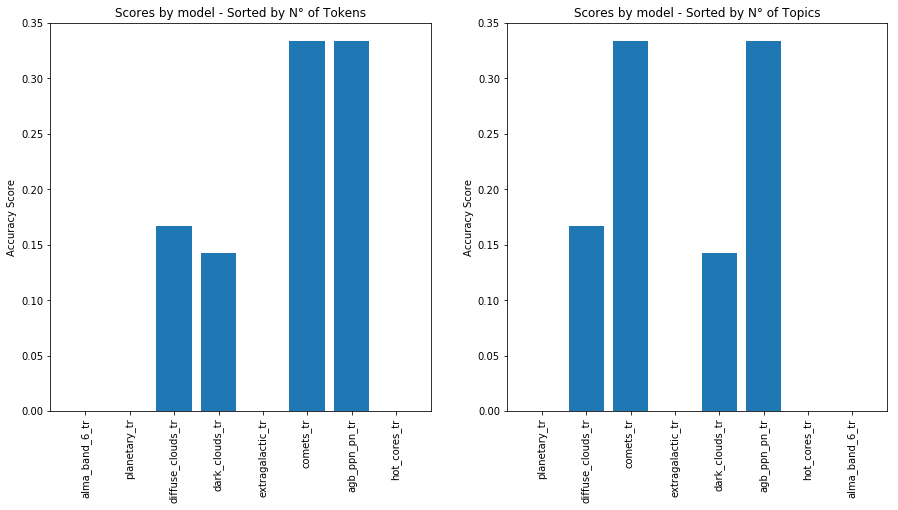

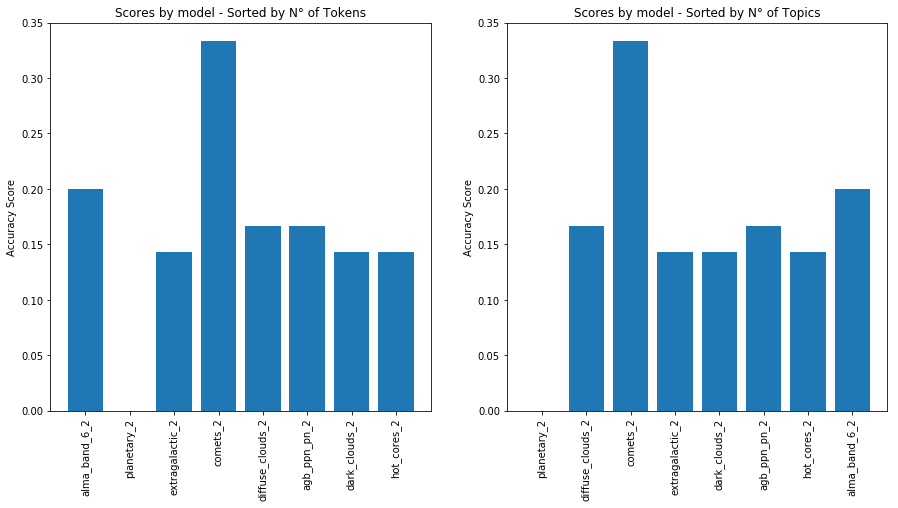

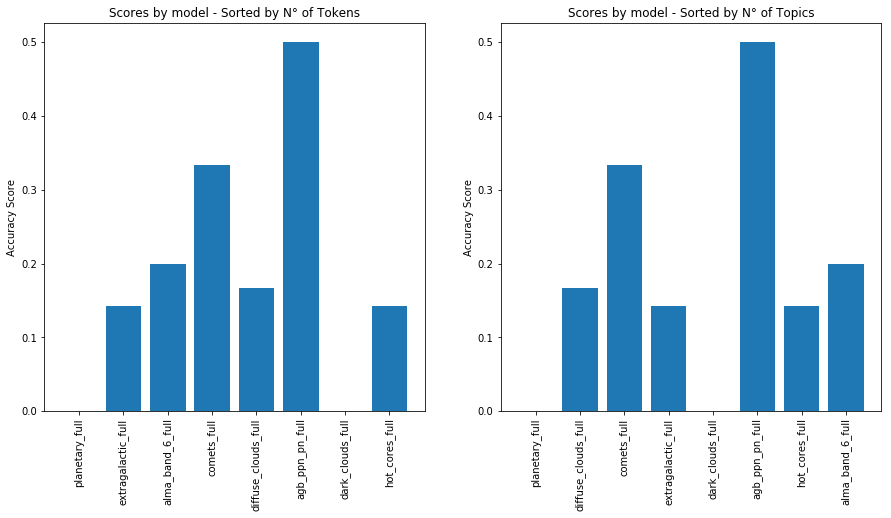

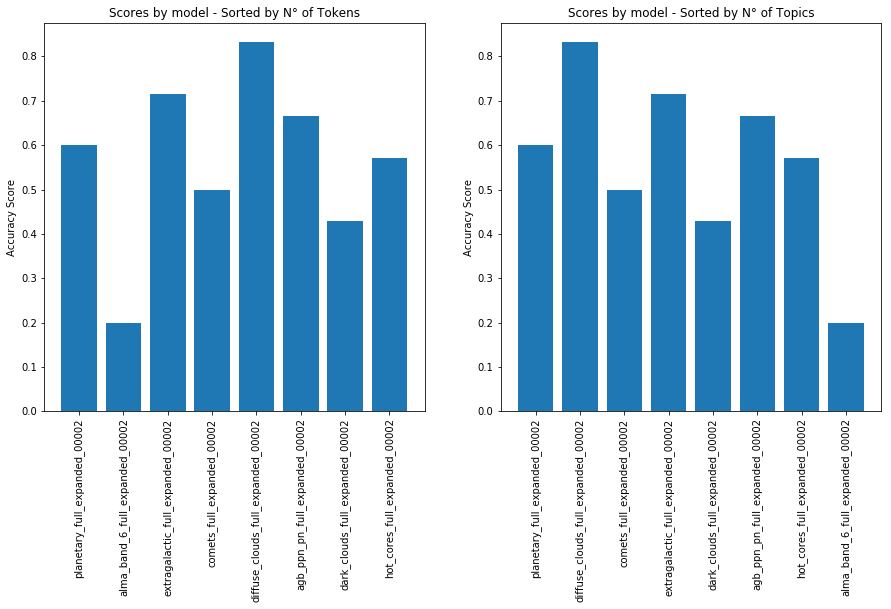

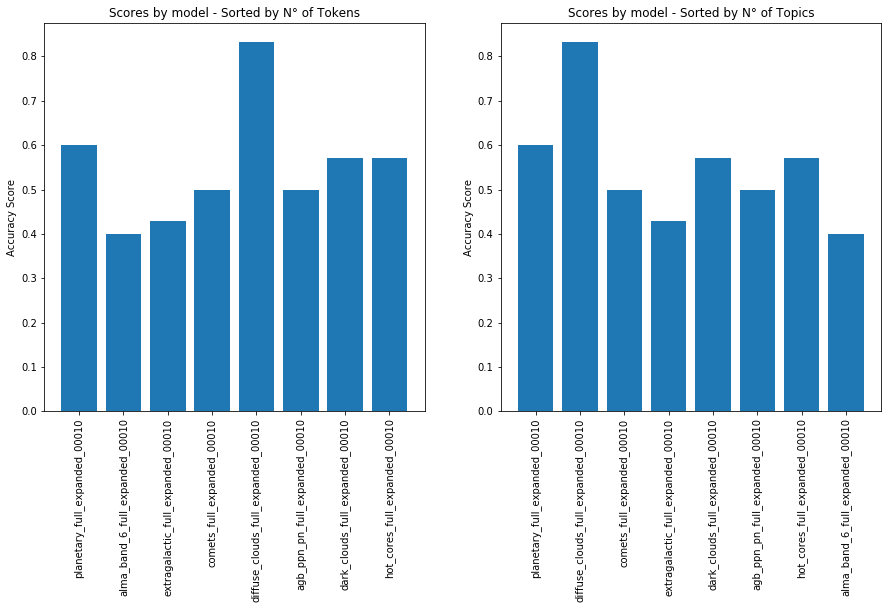

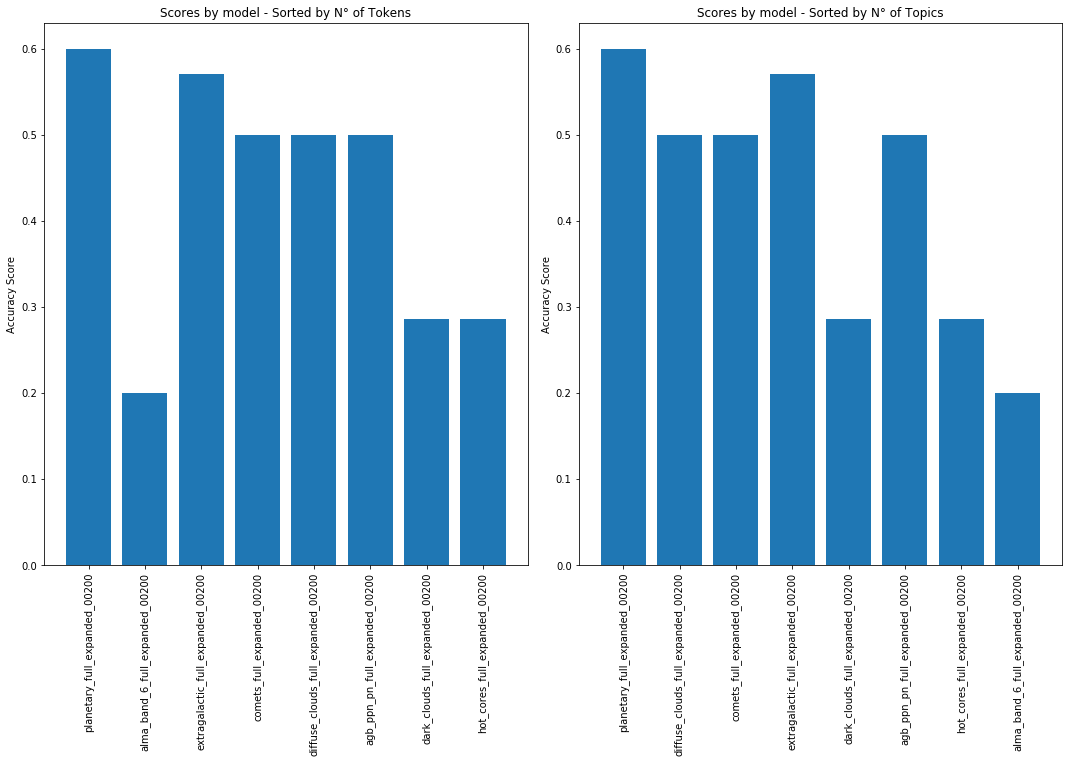

In [20]:
plt.close('all')

fig = plt.figure(figsize=(15,50))

res = results_tr
res = sorted(res,key=lambda x: x[2])
res2 = sorted(res,key=lambda x: x[3])

x = range(len(res))
x2 = range(len(res2))

plt.subplot(6,2,1)
plt.bar(x, [i[1] for i in res], align='center')
plt.ylabel('Accuracy Score')
plt.title('Scores by model - Sorted by N° of Tokens')
plt.xticks(x, [i[0] for i in res],rotation='vertical')

plt.subplot(6,2,2)
plt.bar(x2, [i[1] for i in res2], align='center')
plt.ylabel('Accuracy Score')
plt.title('Scores by model - Sorted by N° of Topics')
plt.xticks(x2, [i[0] for i in res2],rotation='vertical')

############################################################
fig = plt.figure(figsize=(15,50))

res = results_2

res = sorted(res,key=lambda x: x[2])
res2 = sorted(res,key=lambda x: x[3])

x = range(len(res))
x2 = range(len(res2))

plt.subplot(6,2,3)
plt.bar(x, [i[1] for i in res], align='center')
plt.ylabel('Accuracy Score')
plt.title('Scores by model - Sorted by N° of Tokens')
plt.xticks(x, [i[0] for i in res],rotation='vertical')

plt.subplot(6,2,4)
plt.bar(x2, [i[1] for i in res2], align='center')
plt.ylabel('Accuracy Score')
plt.title('Scores by model - Sorted by N° of Topics')
plt.xticks(x2, [i[0] for i in res2],rotation='vertical')

############################################################
fig = plt.figure(figsize=(15,50))

res = results_full

res = sorted(res,key=lambda x: x[2])
res2 = sorted(res,key=lambda x: x[3])

x = range(len(res))
x2 = range(len(res2))

plt.subplot(6,2,5)
plt.bar(x, [i[1] for i in res], align='center')
plt.ylabel('Accuracy Score')
plt.title('Scores by model - Sorted by N° of Tokens')
plt.xticks(x, [i[0] for i in res],rotation='vertical')

plt.subplot(6,2,6)
plt.bar(x2, [i[1] for i in res2], align='center')
plt.ylabel('Accuracy Score')
plt.title('Scores by model - Sorted by N° of Topics')
plt.xticks(x2, [i[0] for i in res2],rotation='vertical')

############################################################
fig = plt.figure(figsize=(15,50))

res = results_full_e_00002

res = sorted(res,key=lambda x: x[2])
res2 = sorted(res,key=lambda x: x[3])

x = range(len(res))
x2 = range(len(res2))

plt.subplot(6,2,7)
plt.bar(x, [i[1] for i in res], align='center')
plt.ylabel('Accuracy Score')
plt.title('Scores by model - Sorted by N° of Tokens')
plt.xticks(x, [i[0] for i in res],rotation='vertical')

plt.subplot(6,2,8)
plt.bar(x2, [i[1] for i in res2], align='center')
plt.ylabel('Accuracy Score')
plt.title('Scores by model - Sorted by N° of Topics')
plt.xticks(x2, [i[0] for i in res2],rotation='vertical')

############################################################
fig = plt.figure(figsize=(15,50))

res = results_full_e_00010

res = sorted(res,key=lambda x: x[2])
res2 = sorted(res,key=lambda x: x[3])

x = range(len(res))
x2 = range(len(res2))

plt.subplot(6,2,9)
plt.bar(x, [i[1] for i in res], align='center')
plt.ylabel('Accuracy Score')
plt.title('Scores by model - Sorted by N° of Tokens')
plt.xticks(x, [i[0] for i in res],rotation='vertical')

plt.subplot(6,2,10)
plt.bar(x2, [i[1] for i in res2], align='center')
plt.ylabel('Accuracy Score')
plt.title('Scores by model - Sorted by N° of Topics')
plt.xticks(x2, [i[0] for i in res2],rotation='vertical')

############################################################
fig = plt.figure(figsize=(15,50))

res = results_full_e_00200

res = sorted(res,key=lambda x: x[2])
res2 = sorted(res,key=lambda x: x[3])

x = range(len(res))
x2 = range(len(res2))

plt.subplot(6,2,11)
plt.bar(x, [i[1] for i in res], align='center')
plt.ylabel('Accuracy Score')
plt.title('Scores by model - Sorted by N° of Tokens')
plt.xticks(x, [i[0] for i in res],rotation='vertical')

plt.subplot(6,2,12)
plt.bar(x2, [i[1] for i in res2], align='center')
plt.ylabel('Accuracy Score')
plt.title('Scores by model - Sorted by N° of Topics')
plt.xticks(x2, [i[0] for i in res2],rotation='vertical')

#plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
plt.tight_layout()
plt.show()